In [1]:
import random
import string
import polars as pl

In [2]:
def generate_random_string(length: int) -> str:
    return "".join([random.choice(string.ascii_letters) for _ in range(length)])


data = {}
for i in range(1, 11):
    data[f"column_{i}"] = [generate_random_string(10)]
df = pl.DataFrame(data)

In [3]:
with pl.Config(tbl_cols=-1, fmt_str_lengths=4):
    print(df)

shape: (1, 10)
┌───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┐
│ colu… ┆ colu… ┆ colu… ┆ colu… ┆ colu… ┆ colu… ┆ colu… ┆ colu… ┆ colu… ┆ colu… │
│ ---   ┆ ---   ┆ ---   ┆ ---   ┆ ---   ┆ ---   ┆ ---   ┆ ---   ┆ ---   ┆ ---   │
│ str   ┆ str   ┆ str   ┆ str   ┆ str   ┆ str   ┆ str   ┆ str   ┆ str   ┆ str   │
╞═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ aoLK… ┆ yaGo… ┆ NbEf… ┆ ScPN… ┆ wFIO… ┆ XCYO… ┆ wRSK… ┆ gQBq… ┆ dwyW… ┆ LGHk… │
└───────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┘


In [4]:
@pl.Config(ascii_tables=True)
def write_ascii_frame_to_stdout(df: pl.DataFrame) -> None:
    print(str(df))


@pl.Config(verbose=True)
def function_that_im_debugging(df: pl.DataFrame) -> None:
    # Polars operation you want to see the verbose logging of
    pass


write_ascii_frame_to_stdout(df)
function_that_im_debugging(df)

shape: (1, 10)
+-----------+-----------+-----------+-----------+---+-----------+-----------+-----------+----------+
| column_1  | column_2  | column_3  | column_4  | … | column_7  | column_8  | column_9  | column_1 |
| ---       | ---       | ---       | ---       |   | ---       | ---       | ---       | 0        |
| str       | str       | str       | str       |   | str       | str       | str       | ---      |
|           |           |           |           |   |           |           |           | str      |
+==================================================================================================+
| aoLKFaKja | yaGoQkVmo | NbEffqmsF | ScPNWdPps | … | wRSKpOczj | gQBqIwWFa | dwyWLXbHV | LGHkgPKe |
| X         | H         | r         | f         |   | S         | v         | p         | QE       |
+-----------+-----------+-----------+-----------+---+-----------+-----------+-----------+----------+


In [5]:
  import polars as pl

  array_df = pl.DataFrame(
      [
          pl.Series("array_1", [[1, 3], [2, 5]]),
          pl.Series("array_2", [[1, 7, 3], [8, 1, 0]]),
      ],
      schema={
          "array_1": pl.Array(shape=2, inner=pl.Int64),
          "array_2": pl.Array(shape=3, inner=pl.Int64),
      },
  )
  array_df

array_1,array_2
"array[i64, 2]","array[i64, 3]"
"[1, 3]","[1, 7, 3]"
"[2, 5]","[8, 1, 0]"


In [6]:
  list_df = pl.DataFrame(
      {
          "integer_lists": [[1, 2], [3, 4]],
          "float_lists": [[1.0, 2.0], [3.0, 4.0]],
      }
  )
  list_df

integer_lists,float_lists
list[i64],list[f64]
"[1, 2]","[1.0, 2.0]"
"[3, 4]","[3.0, 4.0]"


In [7]:
rating_series = pl.Series(
    "ratings",
    [
        {"Movie": "Cars", "Theatre": "NE", "Avg_Rating": 4.5},
        {"Movie": "Toy Story", "Theatre": "ME", "Avg_Rating": 4.9},
    ],
)
rating_series

ratings
struct[3]
"{""Cars"",""NE"",4.5}"
"{""Toy Story"",""ME"",4.9}"


In [8]:
df = pl.DataFrame(
    {
        "value": [None, 2, 3, 4, None, None, 7, 8, 9, None],
    },
)
print(df)

shape: (10, 1)
+-------+
| value |
| ---   |
| i64   |
+=======+
| null  |
| 2     |
| 3     |
| 4     |
| null  |
| null  |
| 7     |
| 8     |
| 9     |
| null  |
+-------+


In [9]:
print(df.with_columns(pl.col("value").fill_null(-1).alias("filled_with_lit")))

print(
    df.with_columns(
        pl.col("value").fill_null(strategy="forward").alias("forward"),
        pl.col("value").fill_null(strategy="backward").alias("backward"),
        pl.col("value").fill_null(strategy="min").alias("min"),
        pl.col("value").fill_null(strategy="max").alias("max"),
        pl.col("value").fill_null(strategy="mean").alias("mean"),
        pl.col("value").fill_null(strategy="zero").alias("zero"),
        pl.col("value").fill_null(strategy="one").alias("one"),
    )
)

shape: (10, 2)
+-------+-----------------+
| value | filled_with_lit |
| ---   | ---             |
| i64   | i64             |
+=========================+
| null  | -1              |
| 2     | 2               |
| 3     | 3               |
| 4     | 4               |
| null  | -1              |
| null  | -1              |
| 7     | 7               |
| 8     | 8               |
| 9     | 9               |
| null  | -1              |
+-------+-----------------+
shape: (10, 8)
+-------+---------+----------+-----+-----+------+------+-----+
| value | forward | backward | min | max | mean | zero | one |
| ---   | ---     | ---      | --- | --- | ---  | ---  | --- |
| i64   | i64     | i64      | i64 | i64 | i64  | i64  | i64 |
+============================================================+
| null  | null    | 2        | 2   | 9   | 5    | 0    | 1   |
| 2     | 2       | 2        | 2   | 2   | 2    | 2    | 2   |
| 3     | 3       | 3        | 3   | 3   | 3    | 3    | 3   |
| 4     | 4       

In [10]:
%%time
trips = pl.read_parquet("data/taxi/yellow_tripdata_*.parquet")
sum_per_vendor = trips.group_by("VendorID").sum()

income_per_distance_per_vendor = sum_per_vendor.select(
    "VendorID",
    income_per_distance=pl.col("total_amount") / pl.col("trip_distance")
)

top_three = (
    income_per_distance_per_vendor.sort(
        by="income_per_distance",
        descending=True
    )
    .head(3)
)
top_three

CPU times: user 15.3 s, sys: 4.76 s, total: 20.1 s
Wall time: 1.23 s


VendorID,income_per_distance
i64,f64
1,6.434789
6,5.296493
5,4.731557


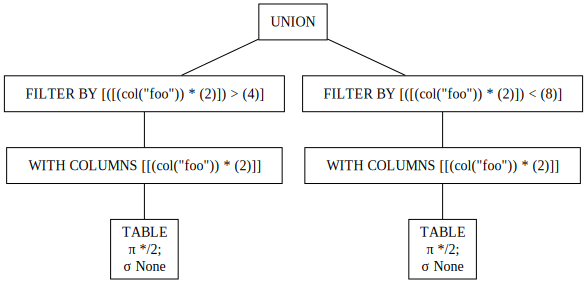

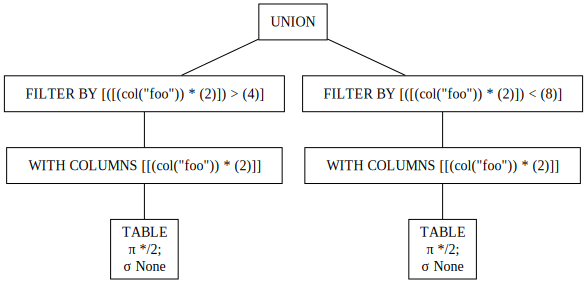

In [11]:
lazy_df = pl.LazyFrame({"foo": [1, 2, 3, 4, 5], "bar": [6, 7, 8, 9, 10]})
common_subplan = lazy_df.with_columns(pl.col("foo") * 2)

expr1 = common_subplan.filter(pl.col("foo") * 2 > 4)
expr2 = common_subplan.filter(pl.col("foo") * 2 < 8)

result = pl.concat([expr1, expr2])
result.show_graph(optimized=False)
result.show_graph()

In [12]:
  %%time
  trips = pl.scan_parquet("data/taxi/yellow_tripdata_*.parquet")
  sum_per_vendor = trips.group_by("VendorID").sum()
  income_per_distance_per_vendor = sum_per_vendor.select(
      "VendorID",
      income_per_distance=pl.col("total_amount") / pl.col("trip_distance")
  )
  top_three = income_per_distance_per_vendor.sort(
      by="income_per_distance",
      descending=True
  ).head(3)
  top_three.collect()

CPU times: user 2.76 s, sys: 547 ms, total: 3.3 s
Wall time: 250 ms


VendorID,income_per_distance
i64,f64
1,6.434789
6,5.296493
5,4.731557


In [13]:
df1 = pl.DataFrame(
    {"categorical_column": ["value1", "value2", "value3"]},
    schema={"categorical_column": pl.Categorical},
)

df1.with_columns(
    pl.col("categorical_column").to_physical().alias("categorical_column_physical")
)

categorical_column,categorical_column_physical
cat,u32
"""value1""",0
"""value2""",1
"""value3""",2
